Epoch 1/10
46/46 [==============================] - 12s 255ms/step - loss: 1.3544 - accuracy: 0.3551 - val_loss: 1.2248 - val_accuracy: 0.4411
Epoch 2/10
46/46 [==============================] - 11s 245ms/step - loss: 1.1662 - accuracy: 0.4464 - val_loss: 1.1193 - val_accuracy: 0.5425
Epoch 3/10
46/46 [==============================] - 11s 248ms/step - loss: 1.0667 - accuracy: 0.5501 - val_loss: 1.0439 - val_accuracy: 0.5671
Epoch 4/10
46/46 [==============================] - 12s 253ms/step - loss: 0.9352 - accuracy: 0.6298 - val_loss: 1.0298 - val_accuracy: 0.5753
Epoch 5/10
46/46 [==============================] - 11s 247ms/step - loss: 0.7808 - accuracy: 0.7136 - val_loss: 0.9577 - val_accuracy: 0.6575
Epoch 6/10
46/46 [==============================] - 11s 248ms/step - loss: 0.6436 - accuracy: 0.7548 - val_loss: 1.0018 - val_accuracy: 0.6493
Epoch 7/10
46/46 [==============================] - 12s 253ms/step - loss: 0.5081 - accuracy: 0.8118 - val_loss: 0.9949 - val_accuracy: 0.6575

/Users/omsharma/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


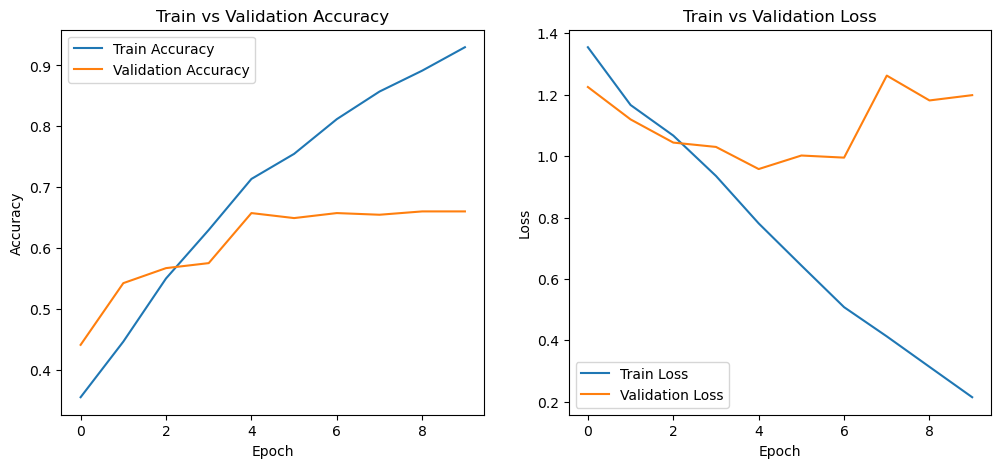

In [1]:
# train_model.py

import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Set dataset paths
DATASET_PATH = "./plant-pathology-2020-fgvc7/"
IMAGE_PATH = os.path.join(DATASET_PATH, "images/")
CSV_PATH = os.path.join(DATASET_PATH, "train.csv")

# Load dataset
df = pd.read_csv(CSV_PATH)
labels = ['healthy', 'multiple_diseases', 'rust', 'scab']
df['label'] = df[labels].idxmax(axis=1)

# Preprocess images
IMG_SIZE = 128
def load_image(image_id):
    path = os.path.join(IMAGE_PATH, f"{image_id}.jpg")
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return img

X = np.array([load_image(img_id) for img_id in df['image_id']])
y = pd.get_dummies(df['label']).values

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Save model
os.makedirs('saved_model', exist_ok=True)
model.save('saved_model/plant_disease_model.h5')

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.show()
